In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import fetch_openml
from sklearn.datasets import make_classification
from time import time
from sklearn import metrics

In [2]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)

In [3]:
svm_linear = SVC(kernel='linear', C=100)
svm_linear.fit(X, y)
svm_linear.coef_

array([[-2.49920793,  6.14683189]])

In [4]:
c=[1,5,10,20,30,40,50,60,70,80,90,100,1000]
for i in c:
  svm_linear = SVC(kernel='linear', C=i)
  svm_linear.fit(X, y)
  print(f'C={i} {svm_linear.coef_}')

C=1 [[-0.90215515  2.15540106]]
C=5 [[-1.84463184  4.04999787]]
C=10 [[-2.12737347  4.67288335]]
C=20 [[-2.26964391  5.58222868]]
C=30 [[-2.49920793  6.14683189]]
C=40 [[-2.49920793  6.14683189]]
C=50 [[-2.49920793  6.14683189]]
C=60 [[-2.49920793  6.14683189]]
C=70 [[-2.49920793  6.14683189]]
C=80 [[-2.49920793  6.14683189]]
C=90 [[-2.49920793  6.14683189]]
C=100 [[-2.49920793  6.14683189]]
C=1000 [[-2.49920793  6.14683189]]


In [5]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), X.shape[0])
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), X.shape[0])
def plot_decision_regions(X, y, model):
    plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1], linewidth=7, facecolors='green')

    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

    X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])
    X1 = np.linspace(X[:, 1].min(),X[:, 1].max(), X.shape[0])

    X0_grid, X1_grid = np.meshgrid(X0, X1)
    Z = model.decision_function(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)
    plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.contourf(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)

    plt.title("Диаграмма рассеяния c линией разделения и зазором")
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()

In [6]:
y_pred =  svm_linear.predict(X)

[0]


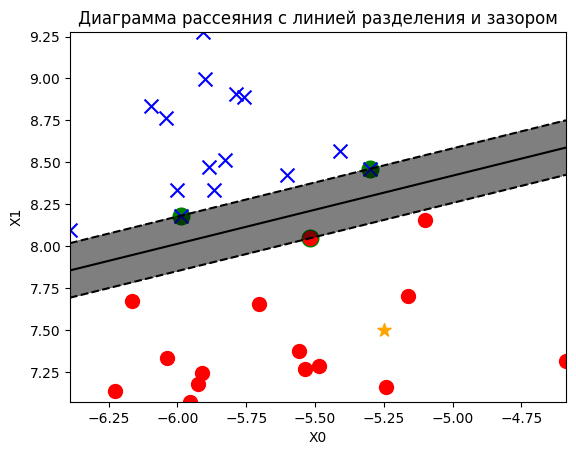

In [7]:
observation_new = [[-5.25, 7.5]]
print(svm_linear.predict(observation_new))
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)

[1]


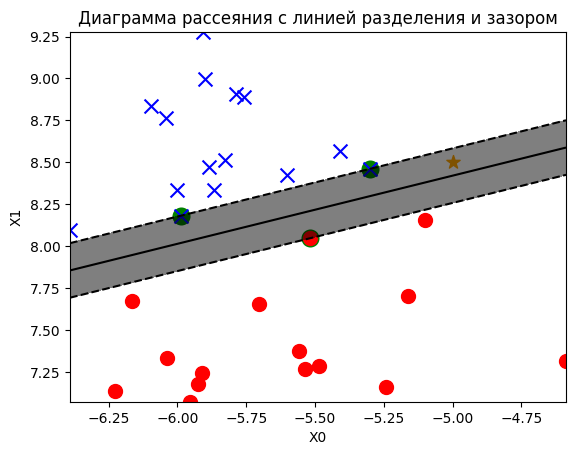

In [8]:
observation_new = [[-5, 8.5]]
print(svm_linear.predict(observation_new))
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)

[0]


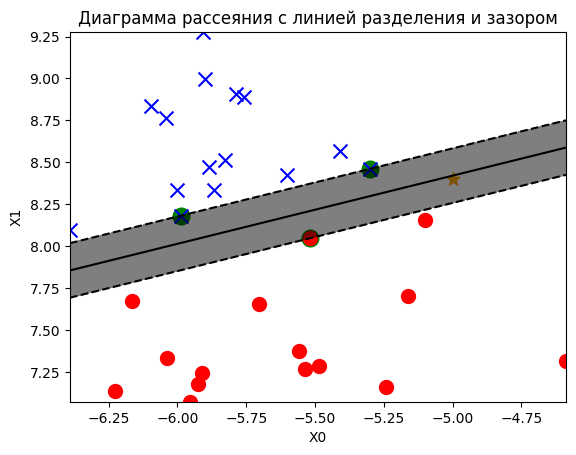

In [9]:
observation_new = [[-5, 8.4]]
print(svm_linear.predict(observation_new))
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)


 linear

accuracy_score: 0.4666666666666667

confusion_matrix: 
[[7 8]
 [8 7]]


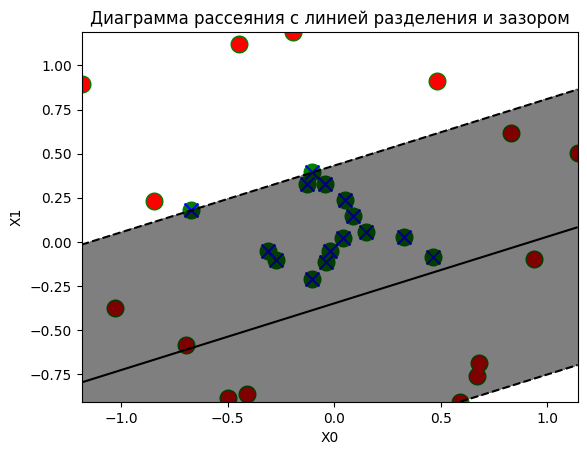


 poly

accuracy_score: 0.4666666666666667

confusion_matrix: 
[[7 8]
 [8 7]]


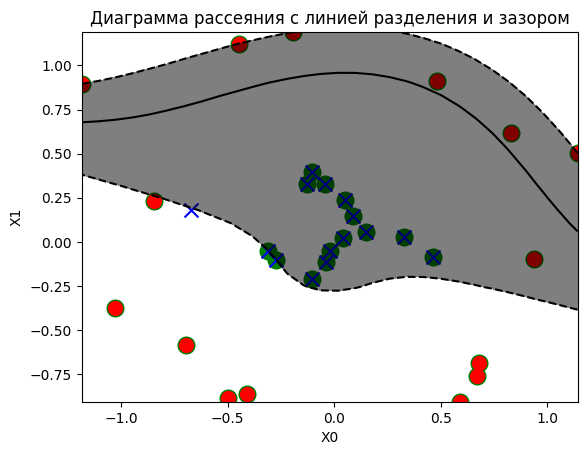


 rbf

accuracy_score: 0.4666666666666667

confusion_matrix: 
[[7 8]
 [8 7]]


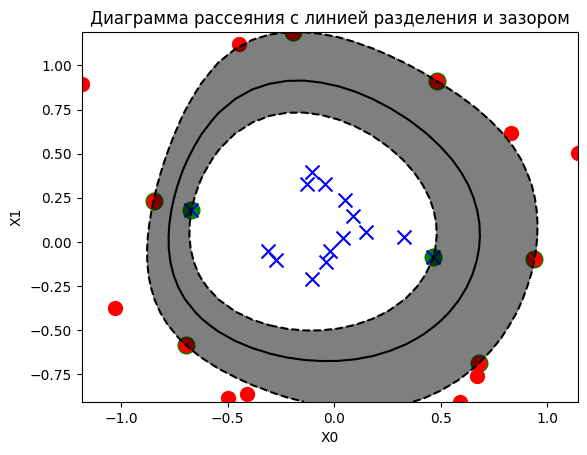


 sigmoid

accuracy_score: 0.4666666666666667

confusion_matrix: 
[[7 8]
 [8 7]]


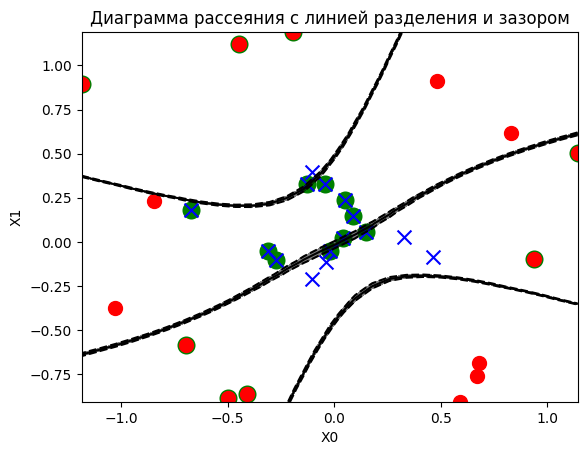

In [10]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
   X, y = make_circles(n_samples=30, random_state=5, factor=.1, noise=.2)
   svm_rbf = SVC(kernel=kernel, C=100).fit(X, y)
   print('\n',kernel)
   print(f'\naccuracy_score: {accuracy_score(y, y_pred)}')
   print(f'\nconfusion_matrix: \n{metrics.confusion_matrix(y, y_pred)}')
   plot_decision_regions(X, y, svm_rbf)

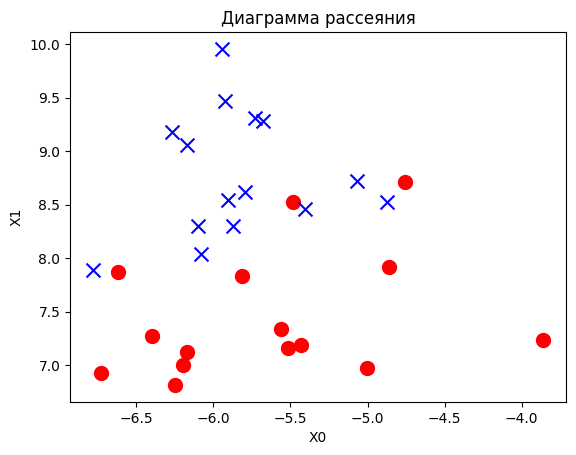

In [11]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

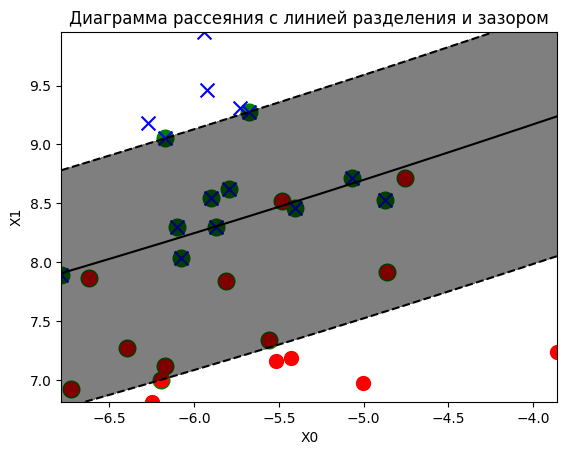

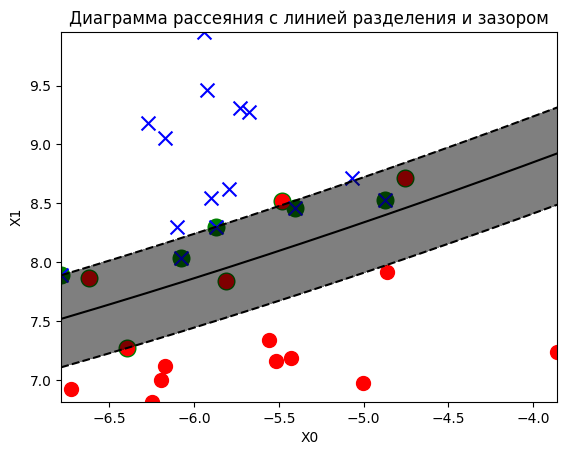

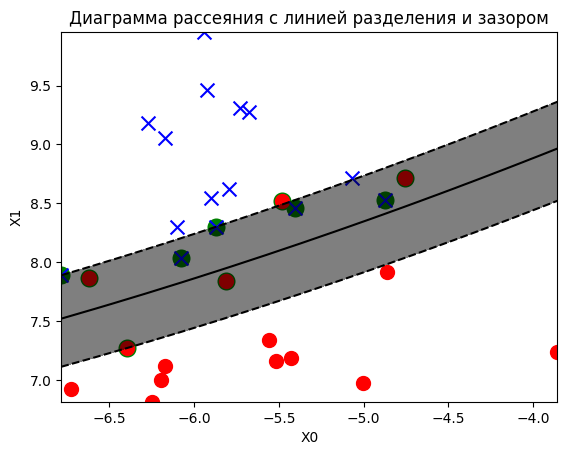

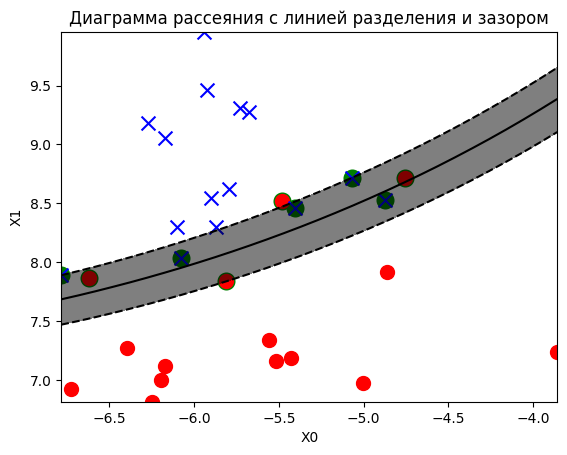

In [14]:
c=[1,50,100,1000]
for i in c:
   svm_poly = SVC(kernel='poly', degree=4, C=i).fit(X, y)
   plot_decision_regions(X, y, svm_poly)

In [18]:
from sklearn.svm import LinearSVC
X, y = make_classification(n_samples=1000, n_features=5, n_informative=3, n_clusters_per_class=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_linear = LinearSVC(C=1)
svm_linear.fit(X_train, y_train)
y_pred = svm_linear.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Точность LinearSVC:", accuracy)

Точность LinearSVC: 0.905


In [20]:
X, y = make_classification(n_samples=1000, n_features=5, n_informative=3, n_clusters_per_class=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC(kernel='rbf', C=1)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Точность SVM на датасете с 1000 точек и 5 атрибутами:", accuracy)

Точность SVM на датасете с 1000 точек и 5 атрибутами: 0.935


In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Наилучшие параметры:", grid_search.best_params_)
print("Точность наилучшей модели:", grid_search.best_score_)

Наилучшие параметры: {'C': 1, 'kernel': 'rbf'}
Точность наилучшей модели: 0.93875


In [26]:
X_large, y_large = make_classification(n_samples=10000, n_features=5, n_informative=3, n_clusters_per_class=1, random_state=42)
X_train_large, X_test_large, y_train_large, y_test_large = train_test_split(X_large, y_large, test_size=0.2, random_state=42)
import time
# время обучения для различных объемов данных
for n in [1000, 5000, 10000]:
    X_subset = X_train_large[:n]
    y_subset = y_train_large[:n]
    start_time = time.time()
    svm.fit(X_subset, y_subset)
    end_time = time.time()
    print(f"Время обучения для {n} точек: {end_time - start_time} сек")

Время обучения для 1000 точек: 0.03162741661071777 сек
Время обучения для 5000 точек: 0.203871488571167 сек
Время обучения для 10000 точек: 0.46770763397216797 сек


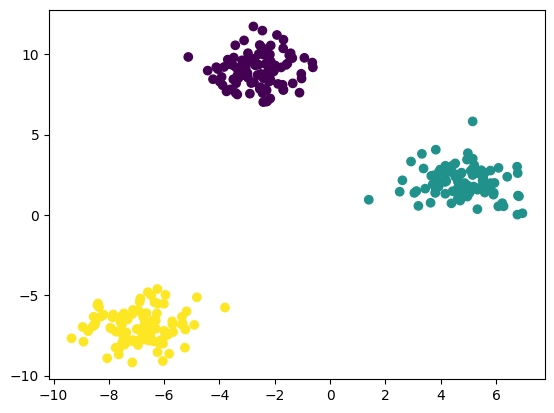

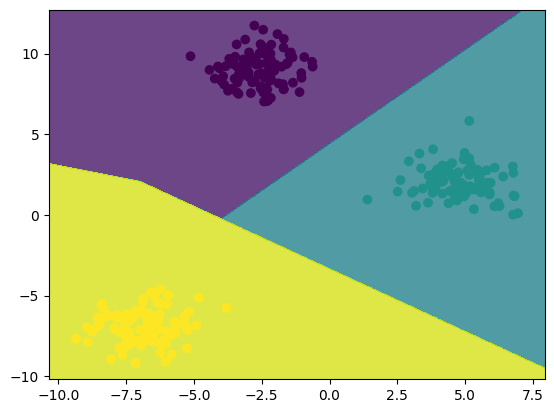

In [27]:
# датасет для множественной классификации
X_multi, y_multi = make_blobs(n_samples=300, centers=3, n_features=2, random_state=42)
plt.scatter(X_multi[:, 0], X_multi[:, 1], c=y_multi, cmap='viridis')
plt.show()

svm_multi = SVC(kernel='linear', C=1)
svm_multi.fit(X_multi, y_multi)

# граница принятия решений и зазор
def plot_decision_boundary(X, y, model):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y)

plot_decision_boundary(X_multi, y_multi, svm_multi)
plt.show()

In [28]:
from sklearn.datasets import load_iris

iris = load_iris()
X_iris = iris.data
y_iris = iris.target

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2)

svm_iris = SVC(kernel='rbf', C=1)
svm_iris.fit(X_train_iris, y_train_iris)
y_pred_iris = svm_iris.predict(X_test_iris)

accuracy_iris = accuracy_score(y_test_iris, y_pred_iris)
print("Точность SVM на датасете Iris:", accuracy_iris)

Точность SVM на датасете Iris: 0.9
